In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif

In [2]:
# Load our data
df = pd.read_csv(r'C:\Users\Asus\Downloads\Thesis\dataset\preprocessed_data.csv')

X = df.drop(columns=['anomaly'])
y = df['anomaly']

In [3]:
# Compute the ANOVA F-value
f_values, p_values = f_classif(X, y)

In [5]:
# Create a DataFrame to view results
results = pd.DataFrame({'Feature': X.columns, 'F-value': f_values, 'P-value': p_values})
results = results.sort_values(by='F-value', ascending=False)

print(results)

    Feature       F-value        P-value
20   FIT504  1.091051e+06   0.000000e+00
11   FIT401  1.090508e+06   0.000000e+00
19   FIT503  1.078101e+06   0.000000e+00
48  UV401_2  1.071961e+06   0.000000e+00
49   P501_2  1.061582e+06   0.000000e+00
21   PIT501  1.060115e+06   0.000000e+00
23   PIT503  1.055522e+06   0.000000e+00
17   FIT501  1.026310e+06   0.000000e+00
18   FIT502  1.004075e+06   0.000000e+00
46   P402_2  9.815666e+05   0.000000e+00
10   AIT402  6.366180e+05   0.000000e+00
12   LIT401  5.304483e+05   0.000000e+00
43  MV304_2  4.213275e+05   0.000000e+00
13   AIT501  3.825183e+05   0.000000e+00
42  MV304_1  3.648959e+05   0.000000e+00
22   PIT502  2.645435e+05   0.000000e+00
14   AIT502  2.479046e+05   0.000000e+00
7    FIT301  1.041214e+05   0.000000e+00
45   P302_2  9.764162e+04   0.000000e+00
38  MV302_1  8.876938e+04   0.000000e+00
39  MV302_2  8.563787e+04   0.000000e+00
6   DPIT301  7.083840e+04   0.000000e+00
1    LIT101  6.750006e+04   0.000000e+00
32   P203_2  6.1

In [6]:
# Selecting features with p < 0.05
selected_features = results[results['P-value'] < 0.05]['Feature']
print(selected_features)

20     FIT504
11     FIT401
19     FIT503
48    UV401_2
49     P501_2
21     PIT501
23     PIT503
17     FIT501
18     FIT502
46     P402_2
10     AIT402
12     LIT401
43    MV304_2
13     AIT501
42    MV304_1
22     PIT502
14     AIT502
7      FIT301
45     P302_2
38    MV302_1
39    MV302_2
6     DPIT301
1      LIT101
32     P203_2
27     P101_2
2      AIT201
29    MV201_1
5      FIT201
30    MV201_2
28     P102_2
34     P205_2
25    MV101_1
0      FIT101
26    MV101_2
3      AIT202
8      LIT301
16     AIT504
9      AIT401
31     P201_2
33     P204_2
35     P206_2
15     AIT503
37    MV301_2
4      AIT203
44     P301_2
36    MV301_1
40    MV303_1
41    MV303_2
24     FIT601
50     P602_2
Name: Feature, dtype: object


In [13]:
#choosing the top 20 features

selected_feature_names = [
    'FIT504', 'FIT401', 'FIT503', 'UV401_2', 'P501_2', 
    'PIT501', 'PIT503', 'FIT501', 'FIT502', 'P402_2' ,'AIT402','LIT401','MV304_2','AIT501','MV304_1','PIT502','AIT502','FIT301','P302_2','MV302_1'
]

data=df[selected_feature_names]

In [14]:
data.shape

(928898, 20)

In [15]:
#adding 'anomaly' feature to our dataset

data=pd.concat([data,y], axis=1)
data = data.astype(np.float64)

In [16]:
print(data.shape)

data.head()

(928898, 21)


,FIT504,FIT401,FIT503,UV401_2,P501_2,PIT501,PIT503,FIT501,FIT502,P402_2,...,LIT401,MV304_2,AIT501,MV304_1,PIT502,AIT502,FIT301,P302_2,MV302_1,anomaly
0,0.0,0.0,0.002179,0.0,0.0,0.004448,0.005921,0.000948,0.001035,0.0,...,0.123250,0.0,0.00479,1.0,0.0,0.328554,0.940694,0.0,0.0,0.0
1,0.0,0.0,0.002179,0.0,0.0,0.004448,0.005921,0.000948,0.001035,0.0,...,0.123338,0.0,0.00479,1.0,0.0,0.328374,0.940371,0.0,0.0,0.0
2,0.0,0.0,0.002179,0.0,0.0,0.004448,0.005921,0.000948,0.001035,0.0,...,0.123250,0.0,0.00479,1.0,0.0,0.328374,0.939886,0.0,0.0,0.0
3,0.0,0.0,0.002179,0.0,0.0,0.004448,0.005921,0.000948,0.001035,0.0,...,0.123426,0.0,0.00479,1.0,0.0,0.328374,0.939886,0.0,0.0,0.0
4,0.0,0.0,0.002179,0.0,0.0,0.004448,0.005921,0.000948,0.001035,0.0,...,0.123691,0.0,0.00479,1.0,0.0,0.328374,0.939886,0.0,0.0,0.0


In [ ]:
data.to_csv(r'C:\Users\Asus\Downloads\Thesis\dataset\data.csv',index=False)

In [29]:
category_counts = data['anomaly'].value_counts()

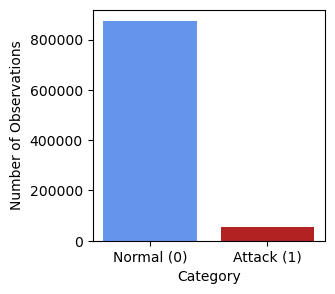

In [30]:
plt.figure(figsize=(3, 3))  # Set the figure size
plt.bar(category_counts.index, category_counts.values, color=['cornflowerblue', 'firebrick'])  # Create a bar chart
plt.xlabel('Category')  # Set the x-label
plt.ylabel('Number of Observations')  # Set the y-label
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Attack (1)'])  # Set the x-ticks labels
plt.show()

In [25]:
# Create a SMOTE object
smote = SMOTE(random_state=42)

# Resample the training set
X_smote, y_smote = smote.fit_resample(X, y)

# Checking the balance
print(y_smote.value_counts())

anomaly
0    875250
1    875250
Name: count, dtype: int64


In [26]:
category_counts=y_smote.value_counts()

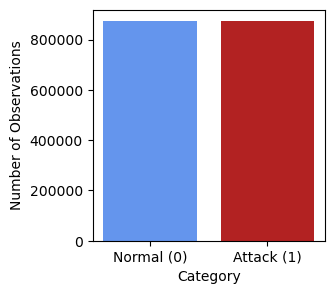

In [28]:
plt.figure(figsize=(3, 3))  # Set the figure size
plt.bar(category_counts.index, category_counts.values, color=['cornflowerblue', 'firebrick'])  # Create a bar chart
plt.xlabel('Category')  # Set the x-label
plt.ylabel('Number of Observations')  # Set the y-label
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Attack (1)'])  # Set the x-ticks labels
plt.show()